In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="OE3Jg3u3F6BPO27NPQFe")
project = rf.workspace("takoyati").project("cigarette-vape-detection")
version = project.version(14)
dataset = version.download("yolov9")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cigarette-Vape-Detection-14 in yolov9:: 100%|██████████| 27712/27712 [00:03<00:00, 7892.03it/s]


In [ ]:
import os
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import shutil

In [ ]:

# 경로 설정
train_dir = '/content/Cigarette-Vape-Detection-14/valid'
labels_dir = os.path.join(train_dir, 'labels')
images_dir = os.path.join(train_dir, 'images')
vape_dir = os.path.join(train_dir, 'vape')
cigarette_dir = os.path.join(train_dir, 'cigarette')

# vape, cigarette 폴더 생성
os.makedirs(vape_dir, exist_ok=True)
os.makedirs(cigarette_dir, exist_ok=True)

# 파일 이동
for label_file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, label_file), 'r') as f:
        label = int(f.read().split()[0])
        image_name = os.path.splitext(label_file)[0]
        image_path = os.path.join(images_dir, image_name + '.jpg')

        if label == 0:
            dst_dir = vape_dir
        else:
            dst_dir = cigarette_dir

        shutil.copy(image_path, os.path.join(dst_dir, image_name + '.jpg'))


In [ ]:
# ImageDataGenerator 설정
data_generator = ImageDataGenerator(  ,validation_split=0.2)

# train_generator 생성
train_generator = data_generator.flow_from_directory(
    '/content/Cigarette-Vape-Detection-14/train/rr',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)
validation_generator = data_generator.flow_from_directory(
    '/content/Cigarette-Vape-Detection-14/valid/rr',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)
test_generator = data_generator.flow_from_directory(
    '/content/Cigarette-Vape-Detection-14/test/rr',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
)


Found 12114 images belonging to 2 classes.
Found 231 images belonging to 2 classes.
Found 577 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation

model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
190/190 [==============================] - 326s 1s/step - loss: 2.0857 - accuracy: 0.5467 - val_loss: 0.6922 - val_accuracy: 0.5325
Epoch 2/10
190/190 [==============================] - 249s 1s/step - loss: 0.6726 - accuracy: 0.5779 - val_loss: 0.6865 - val_accuracy: 0.5411
Epoch 3/10
190/190 [==============================] - 249s 1s/step - loss: 0.6727 - accuracy: 0.5822 - val_loss: 0.6740 - val_accuracy: 0.5931
Epoch 4/10
190/190 [==============================] - 249s 1s/step - loss: 0.6685 - accuracy: 0.5881 - val_loss: 0.6518 - val_accuracy: 0.6190
Epoch 5/10
190/190 [==============================] - 249s 1s/step - loss: 0.6634 - accuracy: 0.5944 - val_loss: 0.7056 - val_accuracy: 0.4372
Epoch 6/10
190/190 [==============================] - 250s 1s/step - loss: 0.6507 - accuracy: 0.6161 - val_loss: 0.6180 - val_accuracy: 0.5195
Epoch 7/10
190/190 [==============================] - 251s 1s/step - loss: 0.6185 - accuracy: 0.6495 - val_loss: 0.6512 - val_accuracy: 0.6450

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
190/190 [==============================] - 251s 1s/step - loss: 0.4494 - accuracy: 0.8047 - val_loss: 0.3729 - val_accuracy: 0.8009
Epoch 2/10
190/190 [==============================] - 251s 1s/step - loss: 0.4230 - accuracy: 0.8148 - val_loss: 0.5018 - val_accuracy: 0.8139
Epoch 3/10
190/190 [==============================] - 251s 1s/step - loss: 0.3992 - accuracy: 0.8242 - val_loss: 0.4493 - val_accuracy: 0.8225
Epoch 4/10
190/190 [==============================] - 251s 1s/step - loss: 0.3901 - accuracy: 0.8329 - val_loss: 0.3206 - val_accuracy: 0.8658
Epoch 5/10
190/190 [==============================] - 251s 1s/step - loss: 0.3570 - accuracy: 0.8493 - val_loss: 0.6726 - val_accuracy: 0.7879
Epoch 6/10
190/190 [==============================] - 251s 1s/step - loss: 0.3479 - accuracy: 0.8528 - val_loss: 1.0247 - val_accuracy: 0.6017
Epoch 7/10
190/190 [==============================] - 251s 1s/step - loss: 0.3296 - accuracy: 0.8630 - val_loss: 0.5850 - val_accuracy: 0.6407

In [ ]:
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
190/190 [==============================] - 252s 1s/step - loss: 0.2944 - accuracy: 0.8706 - val_loss: 0.8254 - val_accuracy: 0.5065
Epoch 2/10
190/190 [==============================] - 251s 1s/step - loss: 0.2760 - accuracy: 0.8840 - val_loss: 0.3592 - val_accuracy: 0.8139
Epoch 3/10
190/190 [==============================] - 251s 1s/step - loss: 0.2611 - accuracy: 0.8900 - val_loss: 0.3284 - val_accuracy: 0.8571
Epoch 4/10
190/190 [==============================] - 251s 1s/step - loss: 0.2489 - accuracy: 0.8929 - val_loss: 0.8178 - val_accuracy: 0.5628
Epoch 5/10
190/190 [==============================] - 251s 1s/step - loss: 0.2265 - accuracy: 0.8998 - val_loss: 1.4566 - val_accuracy: 0.6580
Epoch 6/10
190/190 [==============================] - 251s 1s/step - loss: 0.2144 - accuracy: 0.9030 - val_loss: 0.3999 - val_accuracy: 0.8571
Epoch 7/10
190/190 [==============================] - 251s 1s/step - loss: 0.2131 - accuracy: 0.9073 - val_loss: 0.4871 - val_accuracy: 0.8571

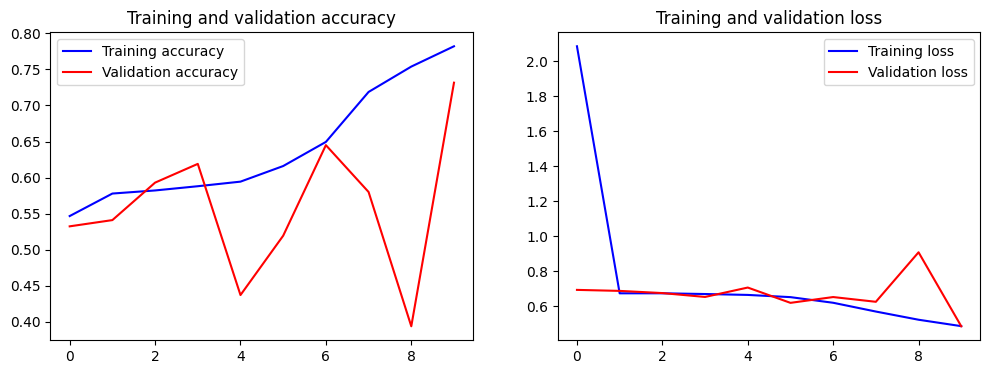

10/10 [==============================] - 5s 511ms/step - loss: 0.5849 - accuracy: 0.8198
Test Accuracy: 0.819757342338562
10/10 [==============================] - 5s 453ms/step


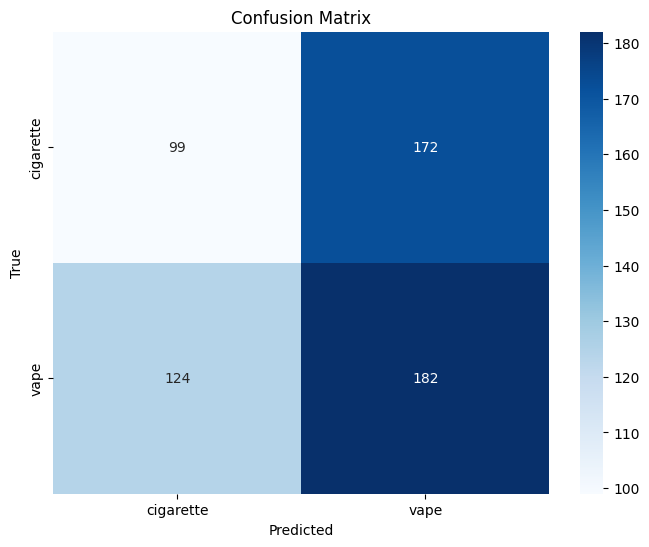

              precision    recall  f1-score   support

   cigarette       0.44      0.37      0.40       271
        vape       0.51      0.59      0.55       306

    accuracy                           0.49       577
   macro avg       0.48      0.48      0.48       577
weighted avg       0.48      0.49      0.48       577



In [ ]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# 예측 값 계산
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(test_generator.classes, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(test_generator.classes, y_pred, target_names=class_names)
print(report)